In [1]:
import matplotlib.pyplot as plt
import statistics
import math
import random

In [2]:
%matplotlib inline

In [113]:
def coin_flip():
    coin = random.randint(0,1)
    if coin == 1:
        return True
    return False

def get_ratio(list_tup):
    return [x/(x+y) for x,y in list_tup]

def get_total(list_tup):
    return [x+y for x,y in list_tup]

In [149]:
def n_flips(n=2**16):
    head_flips = 0
    tail_flips = 0
    checkpoint = []
    for flip in range(n):
        if coin_flip():
            head_flips += 1
        else:
            tail_flips += 1
        if math.log2(flip+1) % 1 == 0:
            checkpoint.append((head_flips, tail_flips))
    if sum(checkpoint[len(checkpoint)-1]) != head_flips + tail_flips:
        checkpoint.append((head_flips,tail_flips))
    
    return checkpoint
flip_data = n_flips()

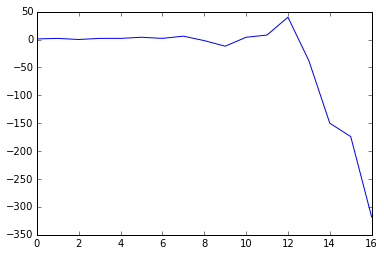

In [119]:
plt.plot([x-y for x,y in flip_data])

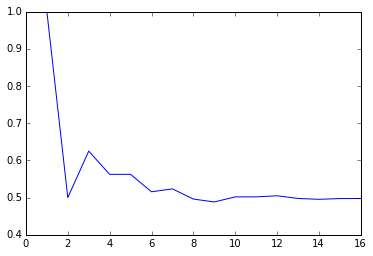

In [120]:
plt.plot(get_ratio(flip_data))

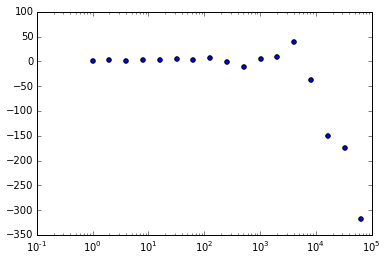

In [117]:
plt.scatter(get_total(flip_data),[x-y for x,y in flip_data])
plt.xscale('log')
plt.show()

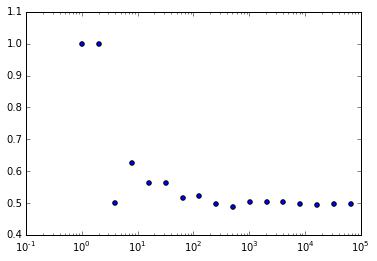

In [115]:
plt.scatter(get_total(flip_data),[x/(x+y) for x,y in flip_data])
plt.xscale('log')
plt.show()

In [103]:
def n_flips_20():
    return [n_flips() for x in range(20)]

In [125]:
twenty = n_flips_20()

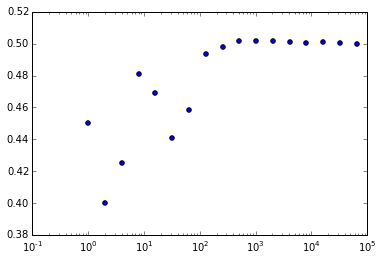

In [126]:
twenty_ratio = [get_ratio(n) for n in twenty]
unpacked_twenty = [statistics.mean(x) for x in list(zip(*twenty_ratio))]
plt.scatter(get_total(flip_data),unpacked_twenty)
plt.xscale('log')

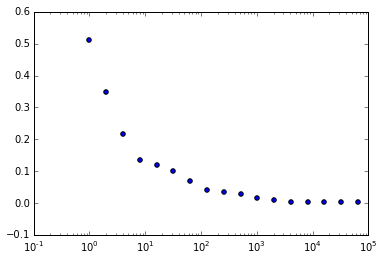

In [141]:
sd_twenty = [statistics.stdev(x) for x in list(zip(*twenty_ratio))]
plt.scatter(get_total(flip_data),sd_twenty)
plt.xscale('log')


In [143]:
def flip_100k_100():
    return [n_flips(100) for x in range(100000)]

In [171]:
hundred_k_100_data = flip_100k_100()

In [173]:
ret = [x[len(x)-1] for x in hundred_k_data]
ratio_hundred_k_100_data = get_ratio(ret)

(array([  2.00000000e+01,   2.99000000e+02,   2.52300000e+03,
          1.07290000e+04,   2.47370000e+04,   3.72690000e+04,
          1.76680000e+04,   5.71200000e+03,   9.51000000e+02,
          9.20000000e+01]),
 array([ 0.28 ,  0.322,  0.364,  0.406,  0.448,  0.49 ,  0.532,  0.574,
         0.616,  0.658,  0.7  ]),
 <a list of 10 Patch objects>)

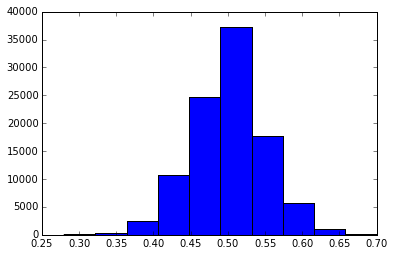

In [175]:
plt.hist(ratio_hundred_k_100_data)


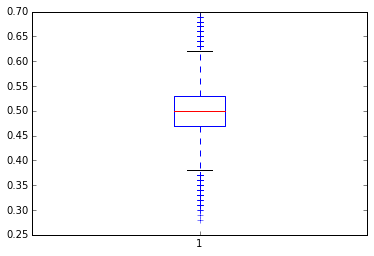

In [176]:
plt.boxplot(ratio_hundred_k_100_data)
plt.show()

In [163]:
def flip_100k_1000():
    return [n_flips(1000) for x in range(100000)]

In [165]:
hundred_k_thousand_data = flip_100k_1000()

In [178]:
ret = [x[len(x)-1] for x in hundred_k_thousand_data]
ratio_100k_thousand_data = get_ratio(ret)

(array([  2.80000000e+01,   5.10000000e+02,   4.12200000e+03,
          1.86770000e+04,   3.30110000e+04,   2.86960000e+04,
          1.26160000e+04,   2.15600000e+03,   1.79000000e+02,
          5.00000000e+00]),
 array([ 0.431 ,  0.4453,  0.4596,  0.4739,  0.4882,  0.5025,  0.5168,
         0.5311,  0.5454,  0.5597,  0.574 ]),
 <a list of 10 Patch objects>)

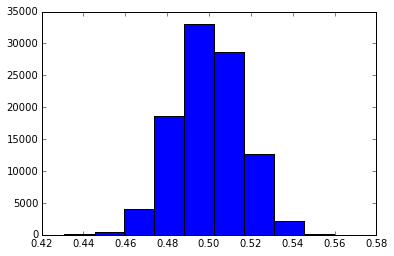

In [179]:
plt.hist(ratio_100k_thousand_data)

{'boxes': [<matplotlib.lines.Line2D at 0x114ba0c50>],
 'caps': [<matplotlib.lines.Line2D at 0x114ba6f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x114bb26d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x114bacef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x114ba0f60>,
  <matplotlib.lines.Line2D at 0x114ba67b8>]}

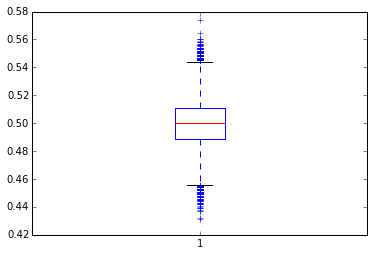

In [181]:
plt.boxplot(ratio_100k_thousand_data)

{'boxes': [<matplotlib.lines.Line2D at 0x116fe0fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x116fed320>,
 'fliers': [<matplotlib.lines.Line2D at 0x116ff1a58>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x116ff12b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x116fe7320>,
  <matplotlib.lines.Line2D at 0x116ffd198>]}

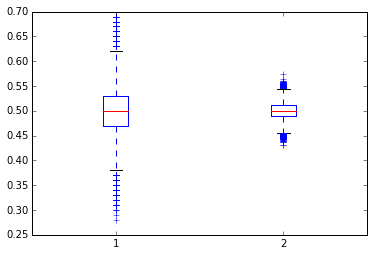

In [185]:
plt.boxplot([ratio_hundred_k_100_data,ratio_100k_thousand_data])